# REGRESIÓN SIMPLE

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

## Paso 0: Datos.

In [2]:
datos = "datos_regresion_full_send.csv"
db = pd.read_csv(datos) #we're in
db.head() #vista previa de los datos

,CONSUMO,PRECIO,INGRESO
0,76.3,20.6,109837
1,48.4,25.2,70434
2,50.5,26.2,73502
3,63.2,20.4,90428
4,59.2,21.7,89843


In [9]:
db.columns.get_loc('CONSUMO')

0

In [68]:
print(db.corr()) #correlaciones entre variables

          CONSUMO   PRECIO   INGRESO
CONSUMO  1.000000 -0.82988  0.985513
PRECIO  -0.829880  1.00000 -0.816380
INGRESO  0.985513 -0.81638  1.000000


In [69]:
#unidades dadas en miles de pesos
unidad = 1000 #miles
nombre_unidad = 'pesos' #de pesos

In [70]:
def ln(x): #creación de valores ln para cada columnas
    return math.log(x)

db['INGRESO_ln'] = db['INGRESO'].apply(ln)
db['CONSUMO_ln'] = db['CONSUMO'].apply(ln)
db['PRECIO_ln'] = db['PRECIO'].apply(ln)

In [71]:
#nombrando cada columna de la base de datos
X = db.loc[:,['INGRESO']].values
y_consumo = db.loc[:,['CONSUMO']].values
y_precio = db.loc[:,['PRECIO']].values
X_log = db.loc[:,['INGRESO_ln']].values
y_consumo_log = db.loc[:,['CONSUMO_ln']].values
y_precio_log = db.loc[:,['PRECIO_ln']].values

In [72]:
#eleccion de variables y nombres IMPORTANTE!!!
nombre_x = 'Ingreso' #en este ejemplo, x siempre será ingreso

variable_dependiente = input('Escoja la variable dependiente: 1 = Consumo; 2 = Precio: ')
if variable_dependiente == '1':
    nombre_y = 'Consumo'
elif variable_dependiente == '2':
    nombre_y = 'Precio'

print('X = {}.'.format(nombre_x))
print('Y = {}.'.format(nombre_y))

X = Ingreso.
Y = Precio.


## Paso 1: Estadística descriptiva univariada. Cálculo e interpretación del CV de cada variable.

In [73]:
#mean_x = media de x
#mean_y = media de y
#std_x = desviación std. de x
#std_y = desviación std. de y
#cv_x = coef. variación x
#cv_y = coef. variación y
#SCx = suma de cuadrados de x
#SCy = suma de cuadrados de y
#SCxy = suma de los productos cruzados x, y

if variable_dependiente == '1':
    mean_x, mean_y = np.mean(X), np.mean(y_consumo)
    std_x, std_y = np.std(X, ddof=1), np.std(y_consumo, ddof=1)
    ###---CÁLCULO DE COEFICIENTES DE VARIACIÓN (cv_x) (cv_y)---###
    cv_x, cv_y = (std_x / mean_x) * 100, (std_y / mean_y) * 100
    ###---INTERPRETACIÓN (cv_x)---###
    print('Coeficiente de variación: {} (x) = {:.2f}%'.format(nombre_x, cv_x))
    if cv_x <= 30:
        print('Los valores de la variable {} son homogéneos;\nMUESTRA REPRESENTATIVA.'.format(nombre_x.lower()))
    elif cv_x > 30 and cv_x < 50:
        print('Los valores de la variable {} son un poco heterogéneos;\nMUESTRA POCO REPRESENTATIVA.'.format(nombre_x.lower()))
    elif cv_x > 50:
        print('Los valores de la variable {} son muy heterógeneos;\nMUESTRA NO REPRESENTATIVA.'.format(nombre_x.lower()))
    ###---INTERPRETACIÓN (cv_y)---###
    print('\nCoeficiente de variación: {} (y) = {:.2f}%'.format(nombre_y, cv_y))
    if cv_y <= 30:
        print('Los valores de la variable {} son homogéneos;\nMUESTRA REPRESENTATIVA.'.format(nombre_y.lower()))
    elif cv_y > 30 and cv_y < 50:
        print('Los valores de la variable {} son un poco heterogéneos;\nMUESTRA POCO REPRESENTATIVA.'.format(nombre_y.lower()))
    elif cv_y > 50:
        print('Los valores de la variable {} son muy heterógeneos;\nMUESTRA NO REPRESENTATIVA.'.format(nombre_y.lower()))
if variable_dependiente == '2':
    mean_x, mean_y = np.mean(X), np.mean(y_precio)
    std_x, std_y = np.std(X, ddof=1), np.std(y_precio, ddof=1)
    ###---CÁLCULO DE COEFICIENTES DE VARIACIÓN (cv_x) (cv_y)---###
    cv_x, cv_y = (std_x / mean_x) * 100, (std_y / mean_y) * 100
    ###---INTERPRETACIÓN (cv_x)---###
    print('Coeficiente de variación: {} (x) = {:.2f}%'.format(nombre_x, cv_x))
    if cv_x <= 30:
        print('Los valores de la variable {} son homogéneos;\nMUESTRA REPRESENTATIVA.'.format(nombre_x.lower()))
    elif cv_x > 30 and cv_x < 50:
        print('Los valores de la variable {} son un poco heterogéneos;\nMUESTRA POCO REPRESENTATIVA.'.format(nombre_x.lower()))
    elif cv_x > 50:
        print('Los valores de la variable {} son muy heterógeneos;\nMUESTRA NO REPRESENTATIVA.'.format(nombre_x.lower()))
    ###---INTERPRETACIÓN (cv_y)---###
    print('\nCoeficiente de variación: {} (y) = {:.2f}%'.format(nombre_y, cv_y))
    if cv_y <= 30:
        print('Los valores de la variable {} son homogéneos;\nMUESTRA REPRESENTATIVA.'.format(nombre_y.lower()))
    elif cv_y > 30 and cv_y < 50:
        print('Los valores de la variable {} son un poco heterogéneos;\nMUESTRA POCO REPRESENTATIVA.'.format(nombre_y.lower()))
    elif cv_y > 50:
        print('Los valores de la variable {} son muy heterógeneos;\nMUESTRA NO REPRESENTATIVA.'.format(nombre_y.lower()))

Coeficiente de variación: Ingreso (x) = 49.11%
Los valores de la variable ingreso son un poco heterogéneos;
MUESTRA POCO REPRESENTATIVA.

Coeficiente de variación: Precio (y) = 41.23%
Los valores de la variable precio son un poco heterogéneos;
MUESTRA POCO REPRESENTATIVA.


## Paso 2: Diagrama de dispersión y análisis de R^2.

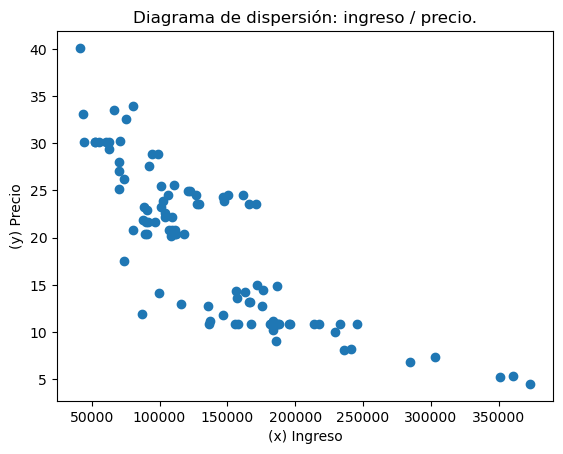

RECOMENDACIÓN: El mejor R2 (0.78) para el modelo ingreso / precio lo arroja una regresión: EXPONENCIAL.


In [74]:
#mejor R2
R2s = []

if variable_dependiente == '1':
    #R2_ingreso_consumo_lineal
    ingreso_consumo_lineal = lr.fit(X, y_consumo)
    R2_consumo_lineal = lr.score(X, y_consumo)
    R2s.append((R2_consumo_lineal, 'LINEAL'))

    #R2_ingreso_consumo_logaritmico
    ingreso_consumo_lineal = lr.fit(X_log, y_consumo)
    R2_consumo_log = lr.score(X_log, y_consumo)
    R2s.append((R2_consumo_log, 'LOGARÍTMICO'))

    #ingreso_consumo_exponencial
    ingreso_consumo_exp = lr.fit(X, y_consumo_log)
    R2_consumo_exp = lr.score(X, y_consumo_log)
    R2s.append((R2_consumo_exp, 'EXPONENCIAL'))

    #ingreso_consumo_potencial
    ingreso_consumo_pot = lr.fit(X_log, y_consumo_log)
    R2_consumo_pot = lr.score(X_log, y_consumo_log)
    R2s.append((R2_consumo_pot, 'POTENCIAL'))

    ###---DIAGRAMA DE DISPERSIÓN---###
    plt.title('Diagrama de dispersión: {} / {}.'.format(nombre_x.lower(),
                                                        nombre_y.lower()))
    plt.xlabel('(x) {}'.format(nombre_x))
    plt.ylabel('(y) {}'.format(nombre_y))
    plt.scatter(X, y_consumo) #gráfico de dispersión
    plt.show() #for clean output

elif variable_dependiente == '2':
    #ingreso_consumo_lineal
    ingreso_precio_lineal = lr.fit(X, y_precio)
    R2_precio_lineal = lr.score(X, y_precio)
    R2s.append((R2_precio_lineal, 'LINEAL'))

    #ingreso_consumo_logaritmico
    ingreso_precio_lineal = lr.fit(X_log, y_precio)
    R2_precio_log = lr.score(X_log, y_precio)
    R2s.append((R2_precio_log, 'LOGARÍTMICO'))

    #ingreso_consumo_exponencial
    ingreso_precio_exp = lr.fit(X, y_precio_log)
    R2_precio_exp = lr.score(X, y_precio_log)
    R2s.append((R2_precio_exp, 'EXPONENCIAL'))

    #ingreso_consumo_potencial
    ingreso_precio_pot = lr.fit(X_log, y_precio_log)
    R2_precio_pot = lr.score(X_log, y_precio_log)
    R2s.append((R2_precio_pot, 'POTENCIAL'))
    ###---DIAGRAMA DE DISPERSIÓN---###
    plt.title('Diagrama de dispersión: {} / {}.'.format(nombre_x.lower(),
                                                        nombre_y.lower()))
    plt.xlabel('(x) {}'.format(nombre_x))
    plt.ylabel('(y) {}'.format(nombre_y))
    plt.scatter(X, y_precio) #gráfico de dispersión
    plt.show() #for clean output

max_R2 = max(R2s, key=lambda x: x[0]) #recomendación para modelo
print('RECOMENDACIÓN: El mejor R2 ({:.2f}) para el modelo {} / {} lo arroja una regresión: {}.'.format(max_R2[0],
                                                                                                   nombre_x.lower(),
                                                                                                   nombre_y.lower(),
                                                                                                   max_R2[1]))

## Paso 3: Elección, estimación e interpretación del modelo.

In [79]:
modelo = input ('Escoja un modelo: 1 = Linear; 2 = Logarítmico; 3 = Exponencial; 4 = Potencial: ')

if variable_dependiente == '1':

    if modelo == '1':
        #elección_ingreso/consumo_lineal
        ingreso_consumo_lineal = lr.fit(X, y_consumo)
        R2_consumo_lineal = lr.score(X, y_consumo)
        print('REGRESIÓN LINEAL: {} / {}.'.format(nombre_x.lower(),
                                                  nombre_y.lower()))
        print('R^2 = {:.2f}'.format(R2_consumo_lineal))
        a_lin = lr.intercept_
        b_lin = lr.coef_
        print('\nA = {:.2f}'.format(a_lin[0]))
        #interpretación_ingreso/consumo_lineal
        print('Si {} es constante, {} es igual a {:.2f} {}.'.format(nombre_x.lower(),
                                                                    nombre_y.lower(),
                                                                    a_lin[0] * unidad,
                                                                    nombre_unidad))
        print('\nB = {:.5f}'.format(b_lin[0][0]))
        print('Por un incremento de {:.2f} {} en {}, el {} aumenta en {:.5f} {}.'.format(unidad,
                                                                                         nombre_unidad,
                                                                                         nombre_x.lower(),
                                                                                         nombre_y.lower(),
                                                                                         b_lin[0][0] * unidad,
                                                                                         nombre_unidad))
        print('\nECUACIÓN: Y = {:.2f} + {:.5f}X'.format(a_lin[0],b_lin[0][0]))
        #estimación_ingreso/consumo_lineal
        print('\nY-ESTIMADA:')
        y_pred = lr.predict(X)
        print(y_pred[0:5]) #primeros 5 valores estimados

    if modelo == '2':
        #elección_ingreso/consumo_log
        ingreso_consumo_lineal = lr.fit(X_log, y_consumo)
        R2_consumo_log = lr.score(X_log, y_consumo)
        print('REGRESIÓN LOGARÍTMICA: {} / {}.'.format(nombre_x.lower(),
                                                       nombre_y.lower()))
        print('\nR^2 = {:.2f}'.format(R2_consumo_log))
        a_log = lr.intercept_
        b_log = lr.coef_
        print('\nA = {:.2f}'.format(a_log[0]))
        print('\nB = {:.5f}'.format(b_log[0][0]))
        #interpretación_ingreso/consumo_log
        print('Por un incremento del 1% en {}, el {} aumenta en {:.5f} {}.'.format(nombre_x.lower(),
                                                                                   nombre_y.lower(),
                                                                                   b_log[0][0] * unidad,
                                                                                   nombre_unidad))
        print('\nECUACIÓN: Y = {:.2f} + {:.5f}LnX'.format(a_log[0],b_log[0][0]))
        #estimación_ingreso/consumo_log
        print('\nY-ESTIMADA:')
        y_pred = lr.predict(X)
        print(y_pred[0:5]) #primeros 5 valores estimados

    if modelo == '3':
        #elección_ingreso/consumo_exp
        ingreso_consumo_exp = lr.fit(X, y_consumo_log)
        R2_consumo_exp = lr.score(X, y_consumo_log)
        print('REGRESIÓN EXPONENCIAL: {} / {}.'.format(nombre_x.lower(),
                                                       nombre_y.lower()))
        print('\nR^2 = {:.2f}'.format(R2_consumo_exp))
        a_exp = lr.intercept_
        b_exp = lr.coef_
        print('\nA = {:.2f}'.format(a_exp[0]))
        print('\nB = {:.5f}'.format(b_exp[0][0]))
        #interpretación_ingreso/consumo_exp
        print('Por un incremento de {:.2f} {} en {}, el {} aumenta en {:.5f} {}.'.format(unidad,
                                                                                         nombre_unidad,
                                                                                         nombre_x.lower(),
                                                                                         nombre_y.lower(),
                                                                                         b_exp[0][0] * unidad,
                                                                                         nombre_unidad))
        print('\nECUACIÓN: Y = Ln[e^{:.2f} * e^{:.7f}X]'.format(a_exp[0],b_exp[0][0]))
        #estimación_ingreso/consumo_exp
        print('\nY-ESTIMADA:')
        y_pred = lr.predict(X)
        print(y_pred[0:5]) #primeros 5 valores estimados

    if modelo == '4':
        #elección_ingreso/consumo_pot
        ingreso_consumo_pot = lr.fit(X_log, y_consumo_log)
        R2_consumo_pot = lr.score(X_log, y_consumo_log)
        print('REGRESIÓN POTENCIAL: {} / {}.'.format(nombre_x.lower(),
                                                  nombre_y.lower()))
        print('\nR^2 = {:.2f}'.format(R2_consumo_pot))
        a_pot = lr.intercept_
        b_pot = lr.coef_
        print('\nA = {:.2f}'.format(a_pot[0]))
        print('\nB = {:.5f}'.format(b_pot[0][0]))
        #interpretación_ingreso/consumo_pot
        print('Por un incremento del 1% en {}, el {} aumenta en {:.2f}%.'.format(nombre_x.lower(),
                                                                                     nombre_y.lower(),
                                                                                     b_pot[0][0] * 100))
        print('\nECUACIÓN: Y = Ln[e^{:.2f} * X^({:.7f}LnX)]'.format(a_pot[0],b_pot[0][0]))
        #estimación_ingreso/consumo_pot
        print('\nY-ESTIMADA:')
        y_pred = lr.predict(X)
        print(y_pred[0:5]) #primeros 5 valores estimados
        
elif variable_dependiente == '2':

    if modelo == '1':
        #elección_ingreso/precio_lineal
        ingreso_precio_lineal = lr.fit(X, y_precio)
        R2_precio_lineal = lr.score(X, y_precio)
        print('REGRESIÓN LINEAL: {} / {}.'.format(nombre_x.lower(),
                                                  nombre_y.lower()))
        print('R^2 = {:.2f}'.format(R2_precio_lineal))
        a_lin = lr.intercept_
        b_lin = lr.coef_
        print('\nA = {:.2f}'.format(a_lin[0]))
        #interpretación_ingreso/precio_lineal
        print('Si {} es constante, {} es igual a {:.2f} {}.'.format(nombre_x.lower(),
                                                                    nombre_y.lower(),
                                                                    a_lin[0] * unidad,
                                                                    nombre_unidad))
        print('\nB = {:.5f}'.format(b_lin[0][0]))
        print('Por un incremento de {:.2f} {} en {}, el {} disminuye en {:.5f} {}.'.format(unidad,
                                                                                         nombre_unidad,
                                                                                         nombre_x.lower(),
                                                                                         nombre_y.lower(),
                                                                                         b_lin[0][0] * unidad,
                                                                                         nombre_unidad))
        print('\nECUACIÓN: Y = {:.2f} + {:.5f}X'.format(a_lin[0],b_lin[0][0]))
        #estimación_ingreso/precio_lineal
        print('\nY-ESTIMADA:')
        y_pred = lr.predict(X)
        print(y_pred[0:5]) #primeros 5 valores estimados
    
    if modelo == '2':
        #elección_ingreso/precio_log
        ingreso_precio_lineal = lr.fit(X_log, y_precio)
        R2_precio_log = lr.score(X_log, y_precio)
        print('REGRESIÓN LOGARÍTMICA: {} / {}.'.format(nombre_x.lower(),
                                                       nombre_y.lower()))
        print('\nR^2 = {:.2f}'.format(R2_precio_log))
        a_log = lr.intercept_
        b_log = lr.coef_
        print('\nA = {:.2f}'.format(a_log[0]))
        print('\nB = {:.5f}'.format(b_log[0][0]))
        #interpretación_ingreso/precio_log
        print('Por un incremento del 1% en {}, el {} disminuye en {:.5f} {}.'.format(nombre_x.lower(),
                                                                                   nombre_y.lower(),
                                                                                   b_log[0][0] * unidad,
                                                                                   nombre_unidad))
        print('\nECUACIÓN: Y = {:.2f} + {:.5f}LnX'.format(a_log[0],b_log[0][0]))
        #estimación_ingreso/precio_log
        print('\nY-ESTIMADA:')
        y_pred = lr.predict(X)
        print(y_pred[0:5]) #primeros 5 valores estimados

    if modelo == '3':
        #elección_ingreso/precio_exp
        ingreso_precio_exp = lr.fit(X, y_precio_log)
        R2_precio_exp = lr.score(X, y_precio_log)
        print('REGRESIÓN EXPONENCIAL: {} / {}.'.format(nombre_x.lower(),
                                                       nombre_y.lower()))
        print('\nR^2 = {:.2f}'.format(R2_precio_exp))
        a_exp = lr.intercept_
        b_exp = lr.coef_
        print('\nA = {:.2f}'.format(a_exp[0]))
        print('\nB = {:.5f}'.format(b_exp[0][0]))
        #interpretación_ingreso/precio_exp
        print('Por un incremento de {:.2f} {} en {}, el {} disminuye en {:.5f} {}.'.format(unidad,
                                                                                         nombre_unidad,
                                                                                         nombre_x.lower(),
                                                                                         nombre_y.lower(),
                                                                                         b_exp[0][0] * unidad,
                                                                                         nombre_unidad))
        print('\nECUACIÓN: Y = Ln[e^{:.2f} * e^{:.7f}X]'.format(a_exp[0],b_exp[0][0]))
        #estimación_ingreso/precio_exp
        print('\nY-ESTIMADA:')
        y_pred = lr.predict(X)
        print(y_pred[0:5]) #primeros 5 valores estimados

    if modelo == '4':
        #elección_ingreso/precio_pot
        ingreso_precio_pot = lr.fit(X_log, y_precio_log)
        R2_precio_pot = lr.score(X_log, y_precio_log)
        print('REGRESIÓN POTENCIAL: {} / {}.'.format(nombre_x.lower(),
                                                  nombre_y.lower()))
        print('\nR^2 = {:.2f}'.format(R2_precio_pot))
        a_pot = lr.intercept_
        b_pot = lr.coef_
        print('\nA = {:.2f}'.format(a_pot[0]))
        print('\nB = {:.5f}'.format(b_pot[0][0]))
        #interpretación_ingreso/precio_pot
        print('Por un incremento del 1% en {}, el {} disminuye en {:.2f}%.'.format(nombre_x.lower(),
                                                                                     nombre_y.lower(),
                                                                                     b_pot[0][0] * 100))
        print('\nECUACIÓN: Y = Ln[e^{:.2f} * X^({:.7f}LnX)]'.format(a_pot[0],b_pot[0][0]))
        #estimación_ingreso/precio_pot
        print('\nY-ESTIMADA:')
        y_pred = lr.predict(X)
        print(y_pred[0:5]) #primeros 5 valores estimados

REGRESIÓN EXPONENCIAL: ingreso / precio.

R^2 = 0.78

A = 3.71

B = -0.00001
Por un incremento de 1000.00 pesos en ingreso, el precio disminuye en -0.00619 pesos.

ECUACIÓN: Y = Ln[e^3.71 * e^-0.0000062X]

Y-ESTIMADA:
[[3.0304102 ]
 [3.27442373]
 [3.25542432]
 [3.15060558]
 [3.15422834]]


## Paso 4: Pronóstico.

In [ ]:
def estimar_valor_lineal():

    x = []
    y = []
    
    x_estimado = None
    while x_estimado != 0:
        x_estimado = float(input('Ingrese un valor que desee estimar; (0) para salir: '))
        if x_estimado != 0:
            y_estimado = (pendiente * x_estimado) + interseccion
            x.append(x_estimado)
            y.append(y_estimado)
            print('PRONÓSTICO PARA REGRESIÓN LINEAL:\n')
            print('Se estima que por cada ${:.2f} COP en el {}, haya un {} de ${:.2f} COP.'.format(x_estimado,
                                                                                                   eje_x.lower(),
                                                                                                   eje_y.lower(),
                                                                                                   y_estimado * 1000))

def estimar_valor_log():

    x = []
    y = []
    
    x_estimado = None
    while x_estimado != 0:
        x_estimado = float(input('Ingrese un valor que desee estimar; (0) para salir: '))
        if x_estimado != 0:
            y_estimado = (pendiente * math.log(x_estimado)) + interseccion
            x.append(x_estimado)
            y.append(y_estimado)
            print('PRONÓSTICO PARA REGRESIÓN LOGARÍTMICA:\n')
            print('Se estima que por cada ${:.2f} COP en el {}, haya un {} de ${:.2f} COP.'.format(x_estimado,
                                                                                                   eje_x.lower(),
                                                                                                   eje_y.lower(),
                                                                                                   y_estimado * 1000))

def estimar_valor_exp():

    x = []
    y = []
    
    x_estimado = None
    while x_estimado != 0:
        x_estimado = float(input('Ingrese un valor que desee estimar; (0) para salir: '))
        if x_estimado != 0:
            y_estimado = interseccion + (x_estimado * pendiente)
            x.append(x_estimado)
            y.append(y_estimado)
            print('PRONÓSTICO PARA REGRESIÓN EXPONENCIAL:\n')
            print('Se estima que por cada ${:.2f} COP en el {}, haya un {} de ${:.2f} COP.'.format(x_estimado,
                                                                                                   eje_x.lower(),
                                                                                                   eje_y.lower(),
                                                                                                   y_estimado * 1000))

def estimar_valor_pot():

    x = []
    y = []
    
    x_estimado = None
    while x_estimado != 0:
        x_estimado = float(input('Ingrese un valor que desee estimar; (0) para salir: '))
        if x_estimado != 0:
            y_estimado = (math.e ** interseccion) * (x_estimado ** pendiente)
            x.append(x_estimado)
            y.append(y_estimado)
            print('PRONÓSTICO PARA REGRESIÓN POTENCIAL:\n')
            print('Se estima que por cada ${:.2f} COP en el {}, haya un {} de ${:.2f} COP.'.format(x_estimado,
                                                                                                   eje_x.lower(),
                                                                                                   eje_y.lower(),
                                                                                                   y_estimado * 1000))

if modelo == '1':
    estimar_valor_lineal()
elif modelo == '2':
    estimar_valor_log()
elif modelo == '3':
    estimar_valor_exp()
elif modelo == '4':
    estimar_valor_pot()

In [ ]:
###---TEST---###

#fit_lin = np.polyfit(x, y, 1) #parámetros para lineal
#print('LINEAL: pendiente (m) = {:.3f}; intersección (a) = {:.3f}.\n'.format(fit_lin[0], fit_lin[1]))
#
#fit_log = np.polyfit(x_log, y, 1) #parámetros para logarítmica
#print('LOGARÍTMICA: pendiente (m) = {:.3f}; intersección (a) = {:.3f}.\n'.format(fit_log[0], fit_log[1]))
#
#fit_exp = np.polyfit(x, y_log, 1) #parámetros para exponencial
#print('EXPONENCIAL: pendiente (m) = {:.3f}; intersección (a) = {:.3f}.\n'.format(fit_exp[0], fit_exp[1]))
#
#fit_pot = np.polyfit(x_log, y_log, 1) #parámetros para potencial
#print('POTENCIAL: pendiente (m) = {:.3f}; intersección (a) = {:.3f}.'.format(fit_pot[0], fit_pot[1]))